# Lab 3 - Geometry OOP
- The purpose of this lab is to use object-oriented programming in Python to
design programs with good structure.
- In this laboratory I will start by planning how I want to structure my classes with help
of UML and then implement my planning in Python.

Date: 2021-09-30


In [1]:
from math import pi
from math import sqrt
from geometry_shape import Shape
from circle import Circle
from rectangle import Rectangle
from cube import Cube
from sphere import Sphere

Circle with center point: (0, 0) with radius: 1
1
Circle with center point: (1, 1) with radius: 1
3.141592653589793
3.141592653589793
6.283185307179586
6.283185307179586
True
False
False
True
True


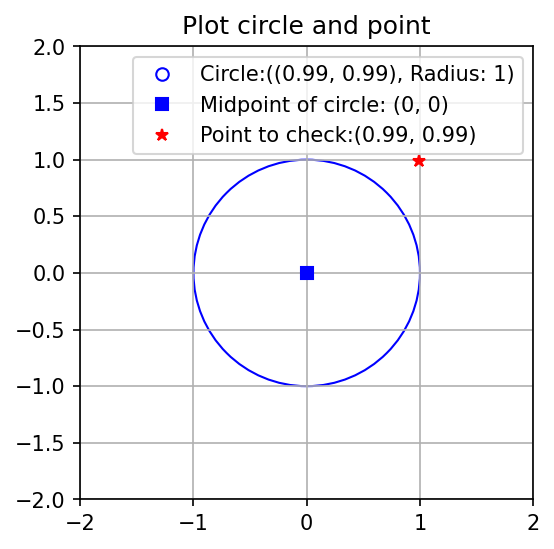

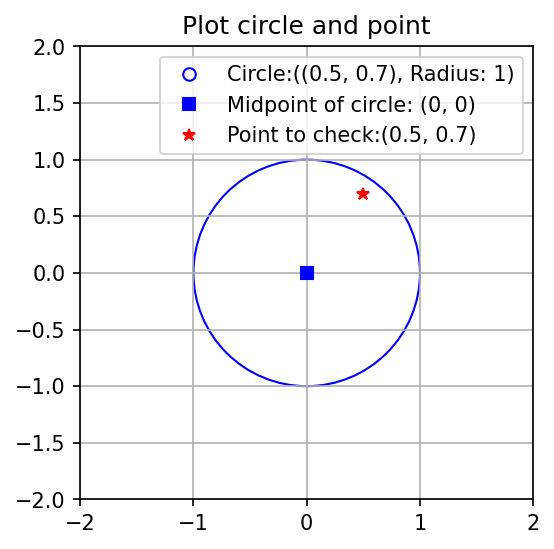

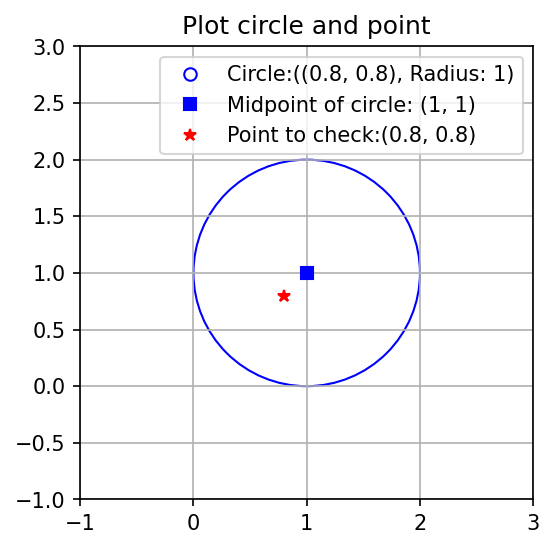

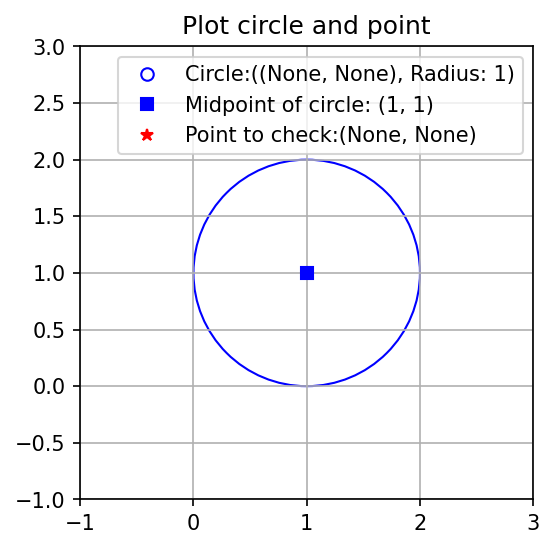

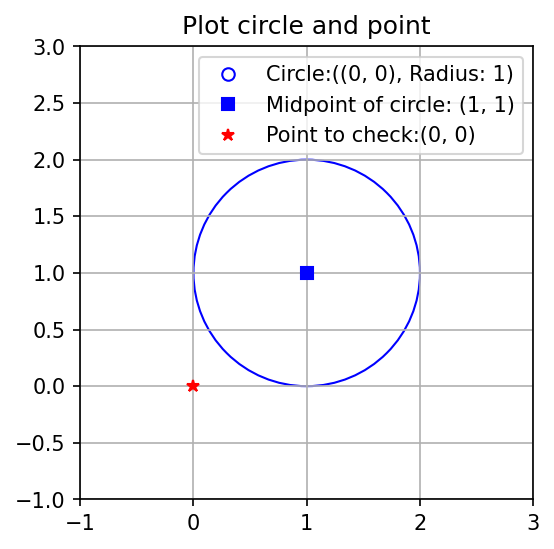

In [2]:
cirkel1 = Circle(x=0,y=0, radius=1) # enhetscirkel
cirkel2 = Circle(x=1,y=1, radius=1)
print(cirkel1)
print(cirkel1.radius)
print(cirkel2)

print(cirkel1.area())
print(cirkel2.area())

print(cirkel1.perimeter())
print(cirkel2.perimeter())

print(cirkel1.is_inside(0.1, 0.1))
print(cirkel2.is_inside(0.1, 0.1))

print(cirkel1.is_inside(0.99, 0.99)) 
print(cirkel1.is_inside(0.5, 0.7)) 
print(cirkel2.is_inside(0.8, 0.8)) 

cirkel1.plot_circle(0.99, 0.99)
cirkel1.plot_circle(0.5, 0.7)

cirkel2.plot_circle(0.8, 0.8)
cirkel2.plot_circle()
cirkel2.plot_circle(0, 0)


In [4]:
try:
    Shape.eu_dis(0,1,0,"2",0,0)
except TypeError as err:
    print(err)

integer or float needed here, not <class 'str'>.


In [5]:
print(cirkel1==cirkel2) # True
print(cirkel1.area())
print(cirkel2.area())

True
3.141592653589793
3.141592653589793


In [6]:
cirkel1.translate(5,5)
print(cirkel1.x)
print(cirkel1.y)

5
5


In [7]:
try:
    cirkel1.translate("TRE",5)
except TypeError as err:
    print(err)


integer or float needed here, not <class 'str'>.


positive number needed here. 0 is not ok.
1
4
False
True
False


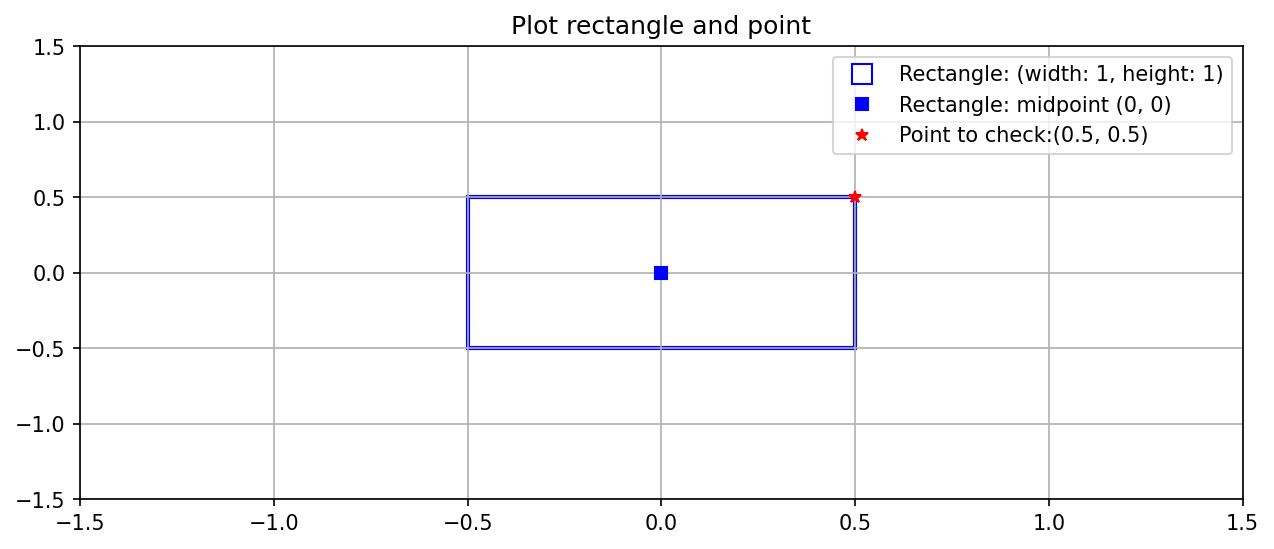

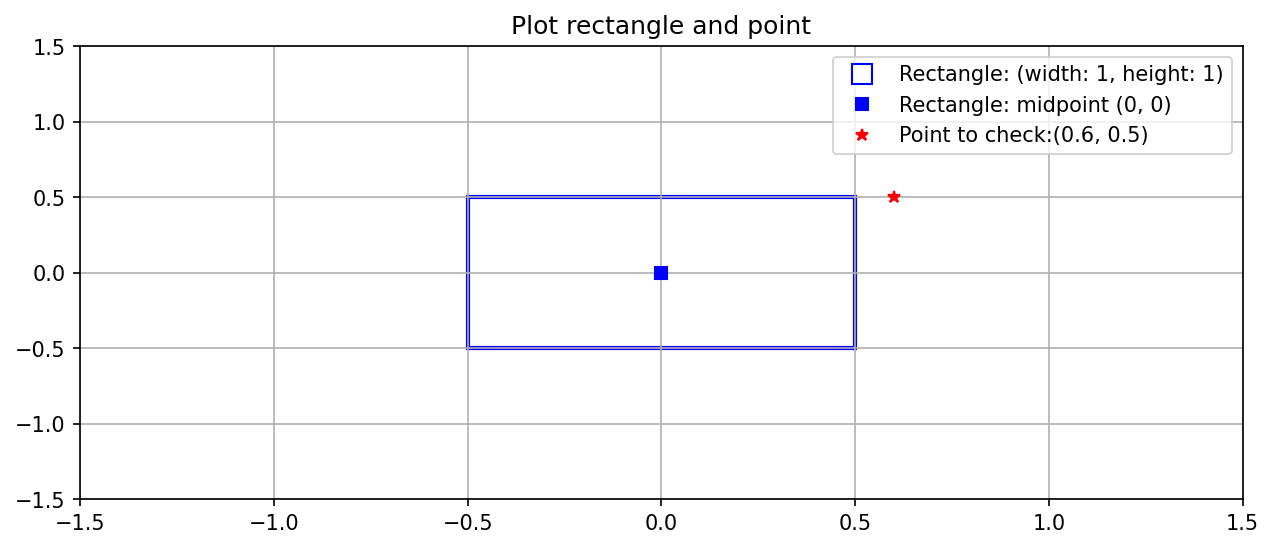

In [3]:
try:
    rektangel = Rectangle(0,0,0, 1)
except ValueError as err:
    print(err)
    
rektangel = Rectangle(x=0,y=0,side1=1, side2=1)

print(rektangel.area())
print(rektangel.perimeter())
print(cirkel2==rektangel) # False
print(rektangel.is_inside(0.5, 0.5)) # True
print(rektangel.is_inside(0.6, 0.5)) # False

rektangel.plot_rectangle(0.5,0.5)
rektangel.plot_rectangle(0.6,0.5)



In [7]:
rektange2 = Rectangle(x=0,y=0,side1=2, side2=1)
rektange3 = Rectangle(x=0,y=0,side1=1, side2=2)
print(rektange2 == rektange3)

True


In [23]:
rektangel.translate(5,-5)
print(rektangel.x)
print(rektangel.y)

5
-5


In [24]:
cube1 = Cube(0, 0, 0, 1)
print(cube1)
print(cube1.is_inside(0.5, 0.5, 0.5))
print(cube1.is_inside(0.6, 0.5, 0.5))

cube2 = Cube(1, 1, 1, 1)
print(cube1)
print(cube1.area())
print(cube2.area())

print(cube1.volume())
print(cube2.volume())

cube1==cube2

Cube with center point: (0, 0, 0) with side length: 1
True
False
Cube with center point: (0, 0, 0) with side length: 1
6
6
1
1


True

In [25]:
cube1.translate(1,1,1)


In [26]:
print(cube1.x)
print(cube1.y)
print(cube1.z)

1
1
1


In [27]:
sphere1 = Sphere(x=0,y=0, z=0, radius=1) 
sphere2 = Sphere(x=1,y=1, z=1, radius=1)
print(sphere1)
print(sphere1.radius)
print(sphere2)

print(sphere1.surface_area())
print(sphere2.surface_area())

print(sphere1.volume())
print(sphere2.volume())

print(sphere1.is_inside(0.99, 0.99, 0.99)) 
print(sphere1.is_inside(0.5, 0.6,0.6)) 
print(sphere2.is_inside(0.1, 0.1, 0.1)) 

Sphere with center point: (0, 0, 0) with radius: 1
1
Sphere with center point: (1, 1, 1) with radius: 1
12.566370614359172
12.566370614359172
4.1887902047863905
4.1887902047863905
False
True
False


In [28]:
print(Shape.eu_dis(0, 0.5, 0, 0.6, 0, 0.6))

0.9848857801796105
